In [1]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# 加载数据集
wine = load_wine()

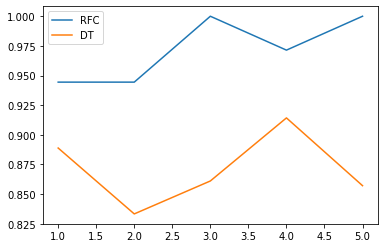

In [4]:
# 交叉验证随机深林和决策树
# 随机深林
rfc = RandomForestClassifier(n_estimators=25)
rfc_score = cross_val_score(rfc, wine.data, wine.target, cv=5)

# 决策树
dt = DecisionTreeClassifier()
dt_score = cross_val_score(dt, wine.data, wine.target, cv=5)

# 画图
x_a = [*range(1, 6)]
plt.plot(x_a, rfc_score, label="RFC")
plt.plot(x_a, dt_score, label="DT")
plt.legend()

In [6]:
import numpy as np

In [9]:
n_range = np.arange(20,51, 1)
list(n_range)

[20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

0.9720634920634922 30


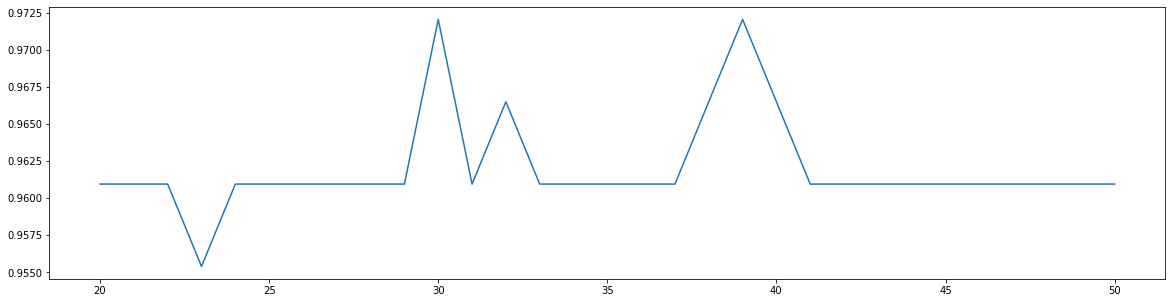

In [21]:
score_range = []
n_range = list(np.arange(20,51, 1))
for i in n_range:
    rfc = RandomForestClassifier(n_estimators=i, n_jobs=-1, random_state=42)
    rfc_score = cross_val_score(rfc, wine.data, wine.target, cv=5).mean()
    score_range.append(rfc_score)
print(max(score_range), n_range[score_range.index(max(score_range))])
plt.figure(figsize=[20, 5])
plt.plot(n_range, score_range)
plt.show()

In [23]:
rfc = RandomForestClassifier(n_estimators=31, n_jobs=-1, random_state=42)
score = cross_val_score(rfc, wine.data, wine.target, cv=5).mean()
score

0.9720634920634922

In [20]:
from scipy.special import comb
np.array([comb(25, i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13, 26)]).sum()

0.00036904803455582827

In [25]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)
rfc = RandomForestClassifier(n_estimators=31, n_jobs=-1, random_state=42).fit(Xtrain, Ytrain)
rfc.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

In [26]:
#无需划分训练集和测试集
 
rfc = RandomForestClassifier(n_estimators=25, oob_score=True, random_state=42)#默认为False
rfc = rfc.fit(wine.data,wine.target)
 
#重要属性oob_score_
rfc.oob_score_#0.9719101123595506

0.9775280898876404

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer#填补缺失值的类
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [28]:
dataset = load_boston()
X_full, y_full = dataset.data, dataset.target
n_samples = X_full.shape[0]#506
n_features = X_full.shape[1]#13

In [32]:
#首先确定我们希望放入的缺失数据的比例，在这里我们假设是50%，那总共就要有3289个数据缺失 
rng = np.random.RandomState(42)#设置一个随机种子，方便观察
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))#3289
#np.floor向下取整，返回.0格式的浮点数
n_missing_samples

3289

In [33]:
#所有数据要随机遍布在数据集的各行各列当中，而一个缺失的数据会需要一个行索引和一个列索引
#如果能够创造一个数组，包含3289个分布在0~506中间的行索引，和3289个分布在0~13之间的列索引，那我们就可以利用索引来为数据中的任意3289个位置赋空值
#然后我们用0，均值和随机森林来填写这些缺失值，然后查看回归的结果如何
 
missing_features = rng.randint(0,n_features,n_missing_samples)#randint（下限，上限，n）指在下限和上限之间取出n个整数
len(missing_features)#3289
missing_samples = rng.randint(0,n_samples,n_missing_samples)
len(missing_samples)#3289

3289

In [34]:
X_missing = X_full.copy()
y_missing = y_full.copy()
 
X_missing[missing_samples,missing_features] = np.nan
 
X_missing = pd.DataFrame(X_missing)
#转换成DataFrame是为了后续方便各种操作，numpy对矩阵的运算速度快到拯救人生，但是在索引等功能上却不如pandas来得好用
X_missing.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,0.0,0.538,NaN,NaN,4.0900,1.0,NaN,15.3,396.90,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,NaN,NaN,17.8,396.90,9.14
2,0.02729,0.0,7.07,NaN,NaN,7.185,NaN,NaN,NaN,242.0,17.8,392.83,NaN
3,NaN,0.0,2.18,0.0,0.458,6.998,NaN,NaN,3.0,222.0,18.7,NaN,2.94
4,NaN,NaN,2.18,NaN,0.458,7.147,NaN,6.0622,NaN,222.0,18.7,NaN,5.33


In [36]:
#使用均值进行填补
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')#实例化
X_missing_mean = imp_mean.fit_transform(X_missing)
# X_missing_mean[:5, :]
pd.DataFrame(X_missing_mean).isnull().sum()#如果求和为0可以彻底确认是否有NaN

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [43]:
X_missing.isnull().sum(axis=0)

0     209
1     194
2     201
3     195
4     204
5     192
6     192
7     203
8     187
9     205
10    184
11    203
12    197
dtype: int64

In [38]:
#使用0进行填补
imp_0 = SimpleImputer(missing_values=np.nan, strategy="constant",fill_value=0)#constant指的是常数
X_missing_0 = imp_0.fit_transform(X_missing)

In [52]:
# 使用随机深林填补缺失值
X_missing_reg = X_missing.copy()

#找出数据集中，缺失值从小到大排列的特征们的顺序，并且有了这些的索引
#np.argsort()返回的是从小到大排序的顺序所对应的索引
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values
sortindex

array([10,  8,  5,  6,  1,  3, 12,  2,  7, 11,  4,  9,  0])

In [45]:
# test
df = X_missing_reg
df.iloc[:1,1] = 6666
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,6666.0,NaN,0.0,0.538,NaN,NaN,4.0900,1.0,NaN,15.3,396.90,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,NaN,NaN,17.8,396.90,9.14
2,0.02729,0.0,7.07,NaN,NaN,7.185,NaN,NaN,NaN,242.0,17.8,392.83,NaN
3,NaN,0.0,2.18,0.0,0.458,6.998,NaN,NaN,3.0,222.0,18.7,NaN,2.94
4,NaN,NaN,2.18,NaN,0.458,7.147,NaN,6.0622,NaN,222.0,18.7,NaN,5.33


In [46]:
X_missing_reg.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,6666.0,NaN,0.0,0.538,NaN,NaN,4.0900,1.0,NaN,15.3,396.90,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,NaN,NaN,17.8,396.90,9.14
2,0.02729,0.0,7.07,NaN,NaN,7.185,NaN,NaN,NaN,242.0,17.8,392.83,NaN
3,NaN,0.0,2.18,0.0,0.458,6.998,NaN,NaN,3.0,222.0,18.7,NaN,2.94
4,NaN,NaN,2.18,NaN,0.458,7.147,NaN,6.0622,NaN,222.0,18.7,NaN,5.33


In [47]:
df1 = df
df1.iloc[:1,1] = 777
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,777.0,NaN,0.0,0.538,NaN,NaN,4.0900,1.0,NaN,15.3,396.90,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,NaN,NaN,17.8,396.90,9.14
2,0.02729,0.0,7.07,NaN,NaN,7.185,NaN,NaN,NaN,242.0,17.8,392.83,NaN
3,NaN,0.0,2.18,0.0,0.458,6.998,NaN,NaN,3.0,222.0,18.7,NaN,2.94
4,NaN,NaN,2.18,NaN,0.458,7.147,NaN,6.0622,NaN,222.0,18.7,NaN,5.33


In [48]:
X_missing_reg.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,777.0,NaN,0.0,0.538,NaN,NaN,4.0900,1.0,NaN,15.3,396.90,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,NaN,NaN,17.8,396.90,9.14
2,0.02729,0.0,7.07,NaN,NaN,7.185,NaN,NaN,NaN,242.0,17.8,392.83,NaN
3,NaN,0.0,2.18,0.0,0.458,6.998,NaN,NaN,3.0,222.0,18.7,NaN,2.94
4,NaN,NaN,2.18,NaN,0.458,7.147,NaN,6.0622,NaN,222.0,18.7,NaN,5.33


In [49]:
df = pd.concat([df.iloc[:,df.columns != 10],pd.DataFrame(y_full)],axis=1)
df.iloc[:1,1] = 111
df.head()

,0,1,2,3,4,5,6,7,8,9,11,12,0
0,NaN,111.0,NaN,0.0,0.538,NaN,NaN,4.0900,1.0,NaN,396.90,4.98,24.0
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,NaN,NaN,396.90,9.14,21.6
2,0.02729,0.0,7.07,NaN,NaN,7.185,NaN,NaN,NaN,242.0,392.83,NaN,34.7
3,NaN,0.0,2.18,0.0,0.458,6.998,NaN,NaN,3.0,222.0,NaN,2.94,33.4
4,NaN,NaN,2.18,NaN,0.458,7.147,NaN,6.0622,NaN,222.0,NaN,5.33,36.2


In [50]:
X_missing_reg.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,777.0,NaN,0.0,0.538,NaN,NaN,4.0900,1.0,NaN,15.3,396.90,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,NaN,NaN,17.8,396.90,9.14
2,0.02729,0.0,7.07,NaN,NaN,7.185,NaN,NaN,NaN,242.0,17.8,392.83,NaN
3,NaN,0.0,2.18,0.0,0.458,6.998,NaN,NaN,3.0,222.0,18.7,NaN,2.94
4,NaN,NaN,2.18,NaN,0.458,7.147,NaN,6.0622,NaN,222.0,18.7,NaN,5.33


In [54]:
for i in sortindex:
    #构建我们的新特征矩阵（没有被选中去填充的特征 + 原始的标签）和新标签（被选中去填充的特征）
    df = X_missing_reg
    #新标签
    fillc = df.iloc[:,i]
    #新特征矩阵
    df = pd.concat([df.iloc[:,df.columns!=i], pd.DataFrame(y_full)], axis=1)

    #在新特征矩阵中，对含有缺失值的列，进行0的填补
    df_0 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(df)

    #找出我们的训练集和测试集
    # Ytrain是被选中要填充的特征中（现在是我们的标签），存在的那些值：非空值
    Ytrain = fillc[fillc.notnull()]
    # Ytrain是被选中要填充的特征中（现在是我们的标签），存在的那些值：非空值
    Ytest = fillc[fillc.isnull()]
    #在新特征矩阵上，被选出来的要填充的特征的非空值所对应的记录
    Xtrain = df_0[Ytrain.index, :]
    #在新特征矩阵上，被选出来的要填充的特征的空值所对应的记录
    Xtest = df_0[Ytest.index, :]

     #用随机森林回归来填补缺失值
    rfc = RandomForestRegressor(n_estimators=100).fit(Xtrain, Ytrain)
    Ypredict = rfc.predict(Xtest)#用predict接口将Xtest导入，得到我们的预测结果（回归结果），就是我们要用来填补空值的这些值
    
    #将填补好的特征返回到我们的原始的特征矩阵中
    X_missing_reg.loc[X_missing_reg.iloc[:,i].isnull(),i] = Ypredict

In [55]:
#检验是否有空值
X_missing_reg.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [57]:
#对所有数据进行建模，取得MSE结果
 
X = [X_full,X_missing_mean,X_missing_0,X_missing_reg]
 
mse = []
std = []
for x in X:
    estimator = RandomForestRegressor(random_state=42, n_estimators=100)#实例化
    scores = cross_val_score(estimator,x,y_full,scoring='neg_mean_squared_error', cv=5).mean()
    mse.append(scores * -1)

In [58]:
[*zip(['Full data','Zero Imputation','Mean Imputation','Regressor Imputation'],mse)]

[('Full data', 21.365927652921755),
 ('Zero Imputation', 37.085819903979804),
 ('Mean Imputation', 41.44060490465928),
 ('Regressor Imputation', 18.940466560027183)]

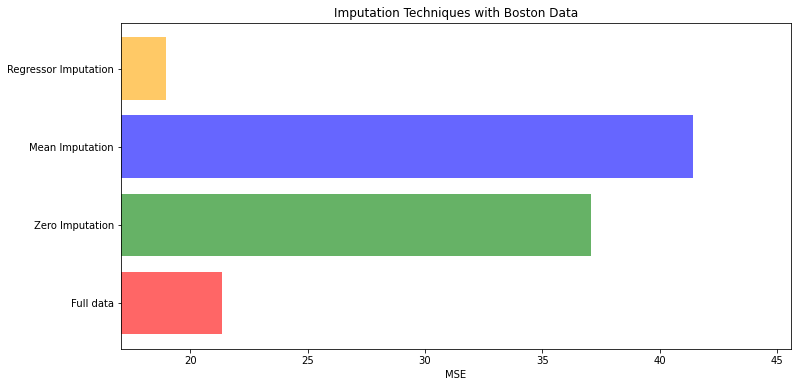

In [59]:
x_labels = ['Full data',
            'Zero Imputation',
            'Mean Imputation',
            'Regressor Imputation']
colors = ['r', 'g', 'b', 'orange']
 
plt.figure(figsize=(12, 6))#画出画布
ax = plt.subplot(111)#添加子图
for i in np.arange(len(mse)):
    ax.barh(i, mse[i],color=colors[i], alpha=0.6, align='center')#bar为条形图，barh为横向条形图，alpha表示条的粗度
ax.set_title('Imputation Techniques with Boston Data')
ax.set_xlim(left=np.min(mse) * 0.9,
             right=np.max(mse) * 1.1)#设置x轴取值范围
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.set_yticklabels(x_labels)
plt.show()

In [60]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [62]:
data = load_breast_cancer()
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
score = cross_val_score(rfc,data.data,data.target,cv=10).mean()#交叉验证的分类默认scoring='accuracy'
score

0.9631578947368421

0.9595870206489675 61


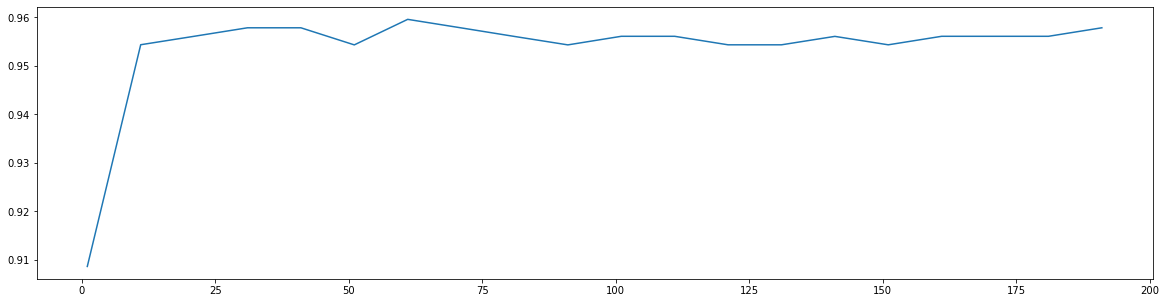

In [63]:
score_list = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=42)
    score = cross_val_score(rfc,data.data,data.target,cv=5).mean()
    score_list.append(score)
print(max(score_list),(score_list.index(max(score_list))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),score_list)
plt.show()

0.9595870206489675 61


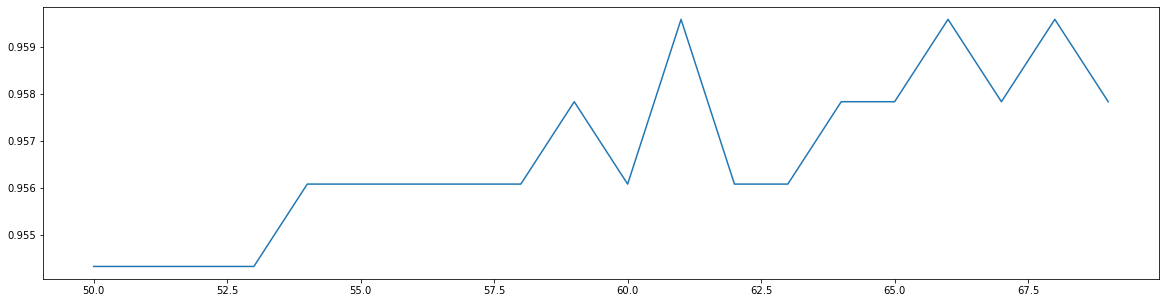

In [66]:
score_list = []
low = 50
higt = 70
gap = 1
estimators_list = range(low, higt, gap)
for i in estimators_list:
    rfc = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1,
                                 random_state=42)
    score = cross_val_score(rfc,data.data,data.target,cv=5).mean()
    score_list.append(score)
print(max(score_list),estimators_list[score_list.index(max(score_list))])
plt.figure(figsize=[20,5])
plt.plot(estimators_list,score_list)
plt.show()

In [67]:
"""
有一些参数是可以找到一个范围的，或者说我们知道他们的取值和随着他们的取值，模型的整体准确率会如何变化，这
样的参数我们就可以直接跑网格搜索
param_grid = {'criterion':['gini', 'entropy']}
 
param_grid = {'min_samples_split':np.arange(2, 2+20, 1)}
 
param_grid = {'min_samples_leaf':np.arange(1, 1+10, 1)}
    
param_grid = {'max_features':np.arange(5,30,1)} 
"""
param_grid = {
    'max_depth':np.arange(1, 20, 1)
    ,'criterion':['gini', 'entropy']
    }
 
#   一般根据数据的大小来进行一个试探，乳腺癌数据很小，所以可以采用1~10，或者1~20这样的试探
#   但对于像digit recognition那样的大型数据来说，我们应该尝试30~50层深度（或许还不足够
#   更应该画出学习曲线，来观察深度对模型的影响
 
rfc = RandomForestClassifier(n_estimators=61
                             ,random_state=42
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)#网格搜索
GS.fit(data.data,data.target)

0.9666353383458647

In [68]:
print(GS.best_score_, GS.best_params_)

0.9666353383458647 {'criterion': 'entropy', 'max_depth': 4}


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = load_breast_cancer()

In [4]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
score = cross_val_score(rfc, data.data, data.target, cv=5).mean()

In [5]:
score

0.9560937742586555

In [9]:
estimator_list = [*range(0, 200, 10)]
estimator_list

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190]

0.9595870206489675 61


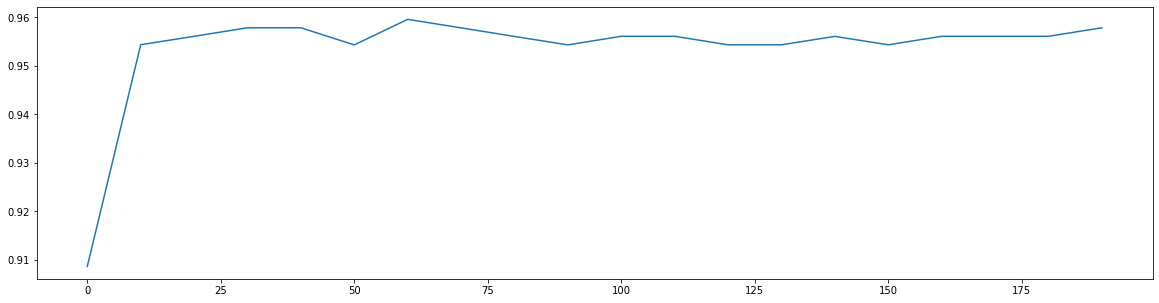

In [12]:
"""
在这里我们选择学习曲线，可以使用网格搜索吗？可以，但是只有学习曲线，才能看见趋势
我个人的倾向是，要看见n_estimators在什么取值开始变得平稳，是否一直推动模型整体准确率的上升等信息
第一次的学习曲线，可以先用来帮助我们划定范围，我们取每十个数作为一个阶段，来观察n_estimators的变化如何
引起模型整体准确率的变化
"""
score = []
estimator_list = [*range(0, 200, 10)]
for i in estimator_list:
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,n_jobs=-1
                                ,random_state=42)
    score.append(cross_val_score(rfc, data.data, data.target, cv=5).mean())
print(max(score), estimator_list[score.index(max(score))]+1)
plt.figure(figsize=[20, 5])
plt.plot(estimator_list, score)
plt.show()

0.9595870206489675 61


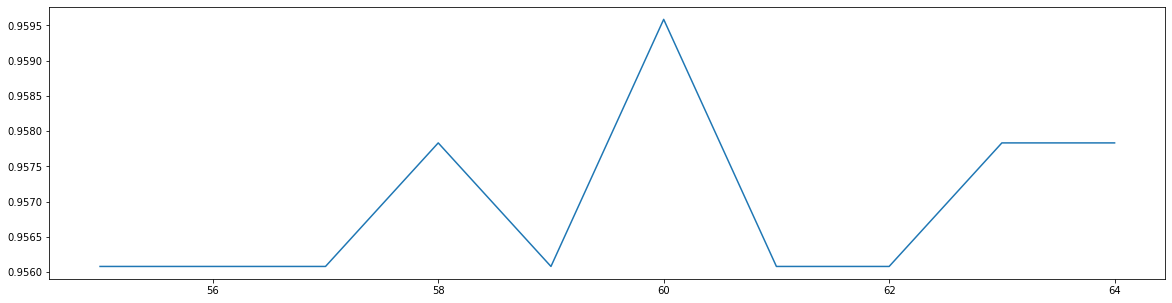

In [13]:
score = []
estimator_list = [*range(55, 65, 1)]
for i in estimator_list:
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,n_jobs=-1
                                ,random_state=42)
    score.append(cross_val_score(rfc, data.data, data.target, cv=5).mean())
print(max(score), estimator_list[score.index(max(score))]+1)
plt.figure(figsize=[20, 5])
plt.plot(estimator_list, score)
plt.show()

In [ ]:
"""
有一些参数是没有参照的，很难说清一个范围，这种情况下我们使用学习曲线，看趋势
从曲线跑出的结果中选取一个更小的区间，再跑曲线
param_grid = {'n_estimators':np.arange(0, 200, 10)}
 
param_grid = {'max_depth':np.arange(1, 20, 1)}
    
param_grid = {'max_leaf_nodes':np.arange(25,50,1)}
    对于大型数据集，可以尝试从1000来构建，先输入1000，每100个叶子一个区间，再逐渐缩小范围
 
有一些参数是可以找到一个范围的，或者说我们知道他们的取值和随着他们的取值，模型的整体准确率会如何变化，这
样的参数我们就可以直接跑网格搜索
param_grid = {'criterion':['gini', 'entropy']}
 
param_grid = {'min_samples_split':np.arange(2, 2+20, 1)}
 
param_grid = {'min_samples_leaf':np.arange(1, 1+10, 1)}
    
param_grid = {'max_features':np.arange(5,30,1)} 
 
"""

In [14]:
#调整max_depth
param_grid = {'max_depth':np.arange(1, 20, 1)}
rfc = RandomForestClassifier(n_estimators=61, random_state=42)
GS = GridSearchCV(rfc, param_grid, cv=5).fit(data.data, data.target)
print(GS.best_params_, GS.best_score_)

{'max_depth': 11} 0.9595870206489675


0.9595870206489675 11


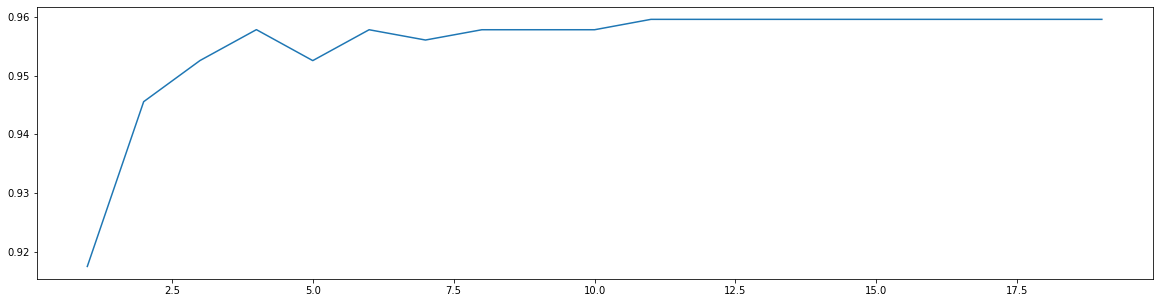

In [17]:
score = []
depth_list = [*range(1, 20, 1)]
for i in depth_list:
    rfc = RandomForestClassifier(n_estimators=61
                                ,max_depth=i
                                ,n_jobs=-1
                                ,random_state=42)
    score.append(cross_val_score(rfc, data.data, data.target, cv=5).mean())
print(max(score), depth_list[score.index(max(score))])
plt.figure(figsize=[20, 5])
plt.plot(depth_list, score)
plt.show()

0.9596025461884802 21


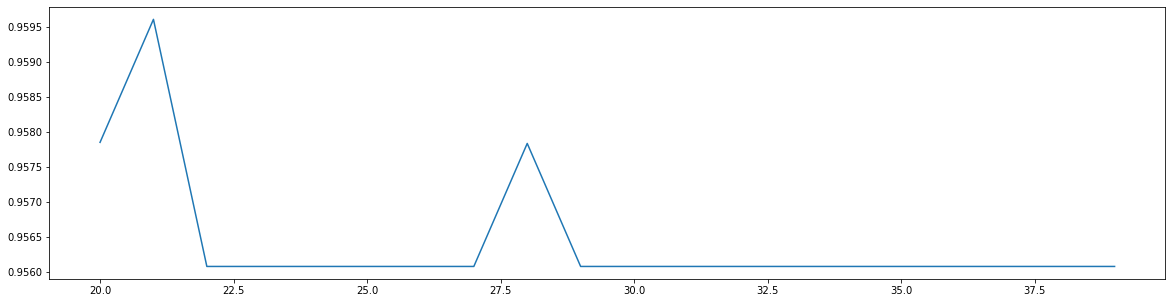

In [18]:
score = []
leaf_list = [*range(20, 40, 1)]
for i in leaf_list:
    rfc = RandomForestClassifier(n_estimators=61
                                ,max_depth=11
                                ,max_leaf_nodes=i
                                ,n_jobs=-1
                                ,random_state=42)
    score.append(cross_val_score(rfc, data.data, data.target, cv=5).mean())
print(max(score), leaf_list[score.index(max(score))])
plt.figure(figsize=[20, 5])
plt.plot(leaf_list, score)
plt.show()

In [19]:
#网格搜索
param_grid = {
    'criterion':['gini', 'entropy']
    ,'min_samples_split':np.arange(2, 2+20, 1)
    }
rfc = RandomForestClassifier(n_estimators=61
                                ,max_depth=11
                                ,max_leaf_nodes=21
                                ,n_jobs=-1
                                ,random_state=42)
GS = GridSearchCV(rfc, param_grid, cv=5).fit(data.data, data.target)
print(GS.best_score_, GS.best_params_)

{'criterion': 'entropy', 'min_samples_split': 13} 0.968390001552554


In [20]:
#网格搜索
param_grid = {
    'criterion':['gini', 'entropy']
    ,'min_samples_leaf':np.arange(1, 1+10, 1)
    }
rfc = RandomForestClassifier(n_estimators=61
                                ,max_depth=11
                                ,max_leaf_nodes=21
                                ,n_jobs=-1
                                ,random_state=42)
GS = GridSearchCV(rfc, param_grid, cv=5).fit(data.data, data.target)
print(GS.best_score_, GS.best_params_)

{'criterion': 'entropy', 'min_samples_leaf': 2} 0.9701288619779538


In [21]:
#网格搜索
param_grid = {
    'criterion':['gini', 'entropy']
    ,'min_samples_leaf':np.arange(1, 1+10, 1)
    ,'min_samples_split':np.arange(2, 2+20, 1)
    }
rfc = RandomForestClassifier(n_estimators=61
                                ,max_depth=11
                                ,max_leaf_nodes=21
                                ,n_jobs=-1
                                ,random_state=42)
GS = GridSearchCV(rfc, param_grid, cv=5).fit(data.data, data.target)
print(GS.best_score_, GS.best_params_)

0.9701288619779538 {'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 2}


In [26]:
rfc = RandomForestClassifier(n_estimators=61
                                ,max_depth=11
                                ,criterion='entropy'
                                ,max_leaf_nodes=21
                                ,min_samples_leaf=2
                                ,n_jobs=-1
                                ,random_state=42)
score = cross_val_score(rfc, data.data, data.target, cv=5).mean()
print(score)

0.9701288619779538


In [27]:
#网格搜索
param_grid = {
    'max_features':np.arange(5,30,1)
    }
rfc = RandomForestClassifier(n_estimators=61
                                ,max_depth=11
                                ,criterion='entropy'
                                ,max_leaf_nodes=21
                                ,min_samples_leaf=2
                                ,n_jobs=-1
                                ,random_state=42)
GS = GridSearchCV(rfc, param_grid, cv=5).fit(data.data, data.target)
print(GS.best_score_, GS.best_params_)

0.9718987734823784 {'max_features': 10}


In [34]:
rfc = RandomForestClassifier(n_estimators=61
                                ,max_depth=11
                                ,criterion='entropy'
                                ,max_features=10
                                ,max_leaf_nodes=21
                                # ,min_samples_leaf=2
                                ,n_jobs=-1
                                ,random_state=42)
score = cross_val_score(rfc, data.data, data.target, cv=5).mean()
print(score)

0.971883247942866
